# ECE 5470 Lab 5 Report

## by Rufei Ye


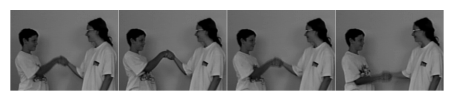

Four 'logo' sized frames from hand.vs
<scaled size: (226 x 1205) >


In [2]:
import numpy as np
from v4 import vx
from v4 import vd
# example display of selected frames
exec(vx.vxsh( 'vclip f=1 hand.vs of=dhand' )) 
for i in (6, 11, 15):
    exec(vx.vxsh( 'vclip f=$i hand.vs | vxfile of=dhand' ))
exec(vx.vxsh( 'vtile dhand n=4,1 -ib -xb of=dhandt' ))
vd.dispmvx("dhandt", size=0.7, capt="Four 'logo' sized frames from hand.vs")


### Section 2 Feature tracking
#### 2.1 Tracking Imge Features in Time



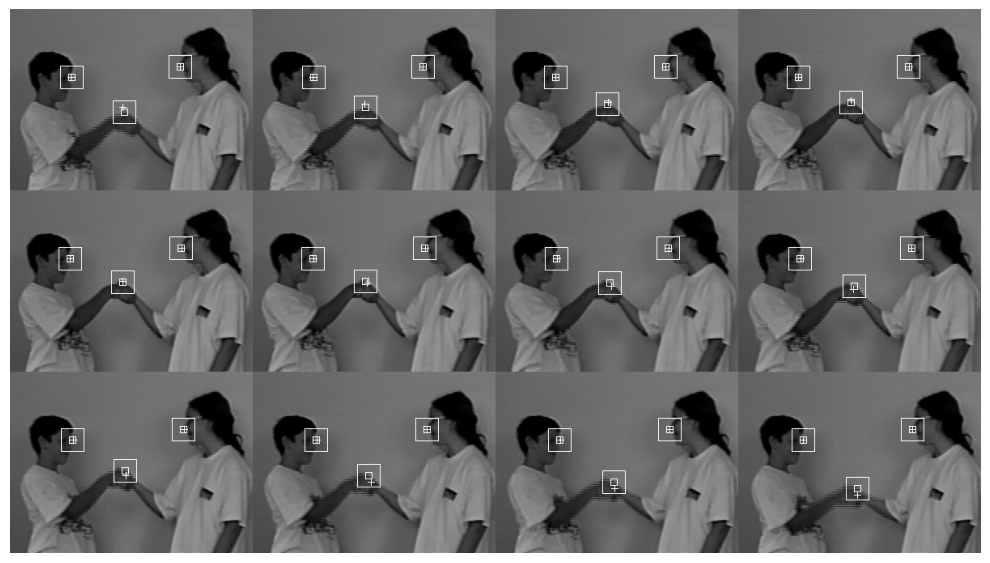

Tracked Hand.vx with three features defined by loc1
<scaled size: (672 x 1200) >


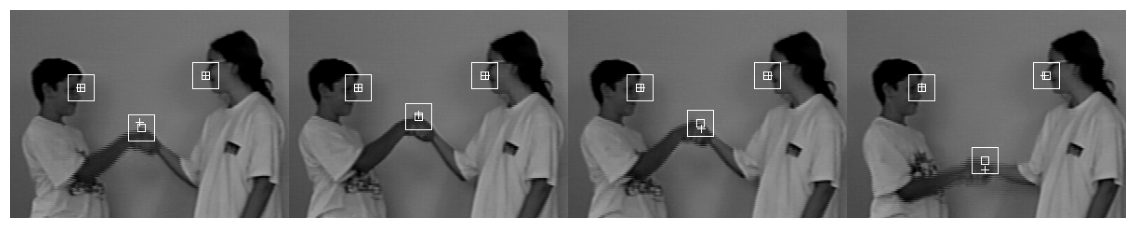

Four frames (1,4,9,14)from trk.vs
<scaled size: (224 x 1200) >


In [13]:
exec(vx.vxsh( 'vtrack if=hand.vs pf=loc1 h=10 v=10 of=trk.vs gf=trk.g' ))
vd.dispmvx('trkt.vs', size=1.8, capt="Tracked Hand.vx with three features defined by loc1" )
exec(vx.vxsh( 'vclip f=1 trk.vs of=dhand' )) 
for i in (4, 9, 14):
    exec(vx.vxsh( 'vclip f=$i trk.vs | vxfile of=dhand' ))
exec(vx.vxsh( 'vtile dhand n=4,1 of=dhandt' ))
vd.dispmvx("dhandt", size=1.8, capt="Four frames (1,4,9,14)from trk.vs")


### Discussion
As the Hand.vx shows, ‘vtrack’ computes the trajectory of image features in the image set of shaking hands. With three features defined by loc1 file, the algorithm traces the movement of two people's face and their heads. The search size is 10x10, and the annotated image set and trajectories of the features are preserved seperately. ‘vtile’ command pastes first 12 sheets of the  image set into a single image with three rows and four columns so that it can be presented through 'vd.dispmvx' as one image.

The dhandt shows the output of the four frames(1,4,9,14) from trk.vs, which is the result of 'vtrack' command. A location search is made in each new frame to match the feature image region identified in the previous frame, so trk.vs only has 14 sheets in the image set. All three features are tracked well. As dhandt shows, the four images are enough to prove that the motion trend of the handshake motion is well captured.

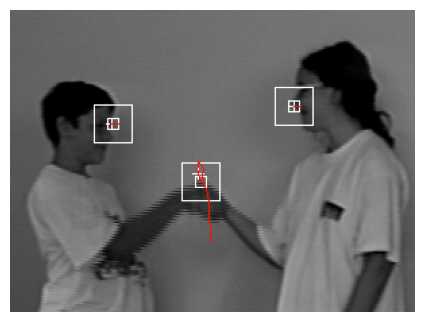

Time trajectories for the tracked feature points in 15 frames on first frame
<scaled size: (224 x 300) >


In [4]:
#  Create a binary image of the tracking trajectories. 
exec(vx.vxsh( 'vrend -w  trk.g of=trkt.vx' ))
#  Select the first image frame of the tracked results
exec(vx.vxsh( 'vclip f=1 if=trk.vs of=trk1.vx' ))
#  Add the tracking trajecctories as a color overlay
exec(vx.vxsh( 'vcmix  if=trk1.vx ig=trkt.vx | vccvt -i of=trkv.vx' ))
vd.dispmvx('trkv.vx', capt="Time trajectories for the tracked feature points in 15 frames on first frame")


In [15]:
! vpr trk.g

[File Name      ]: [6] trk.g
[File Command   ]: [57] vtrack if=hand.vs pf=loc1 h=10 v=10 of=trk.vs gf=trk.g 
[File Machine   ]: [6] linux
[File User ID   ]: 1644334
[File Date      ]: 1665973391
[File History   ]: [123] 

[Bounding Box   ]: [6] 
           0         300           0         224           0          14
[Object ID.     ]: 2
[3-D vector     ]: [45] 
         141          96           0         139         102           1
         138         106           2         139         108           3
         139         110           4         139         111           5
         141         109           6         143         105           7
         142         101           8         143          95           9
         146          87          10         147          79          11
         147          71          12         148          61          13
         148          51          14
[Object ID.     ]: 1
[3-D vector     ]: [45] 
         210         152           0     

Through 'vrend' and 'vcmix', time trajectories for three tracked features are presented well. Similar to the results of the "vpr trk.g" command, the x and y values of object 2 (hand position) change significantly as the z number gets larger, while the x and y values of objects 1 and 0 fluctuate very little. It is true that the heads of the two individuals do not move significantly in the image set, while the change in hand trajectory matches the handshake action.


#### 2.2 Tracking image annotation landmarks 


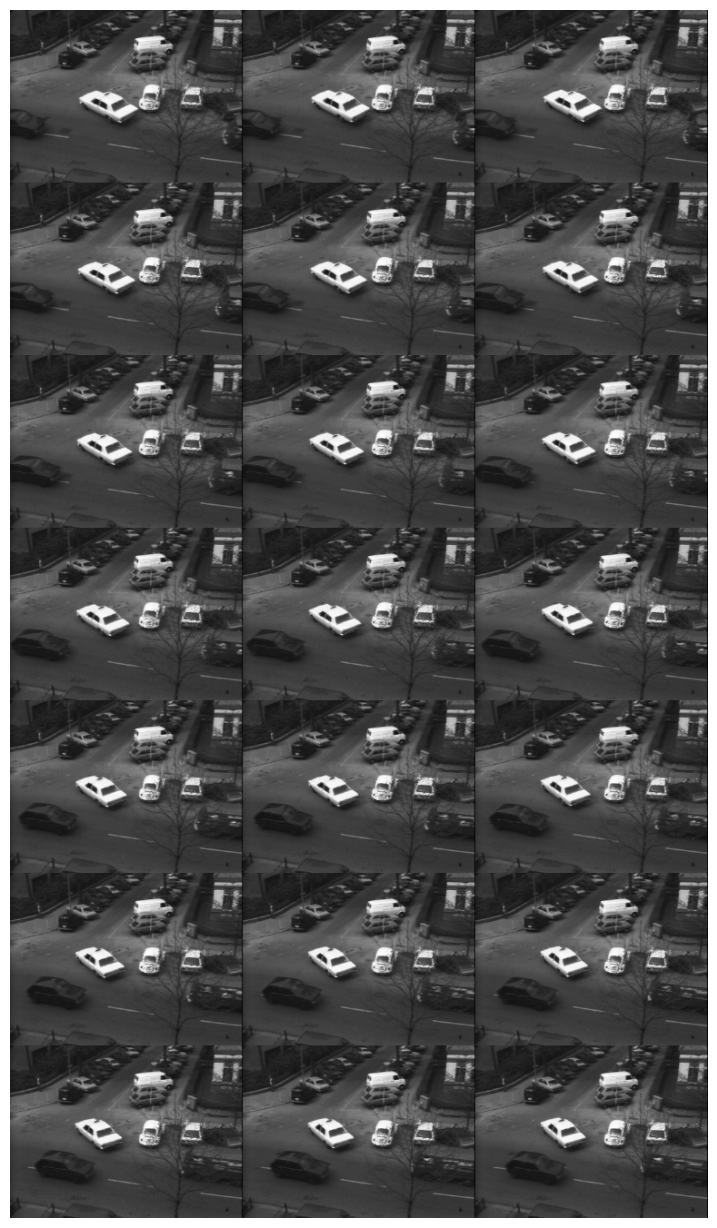

Input 21 image slices of taxi.vs
<scaled size: (1330 x 768) >


In [36]:
exec(vx.vxsh( 'vtile taxi.vs n=3,7 of=taxi21.vs' ))
vd.dispmvx("taxi21.vs", size=4, capt="Input 21 image slices of taxi.vs")

The input taxis.vs file is a sequence of 21 images. It shows three cars intersecting at an intersection, where the white car leaves the intersection and the two black cars travel in opposite directions.

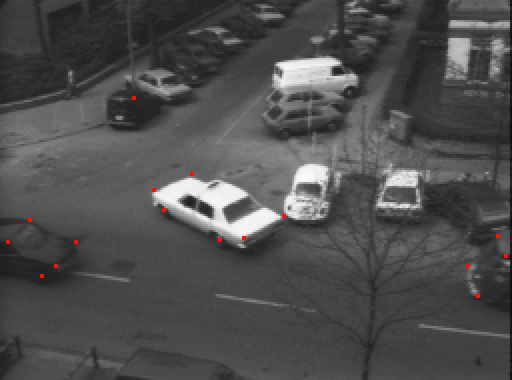

a visualization of the points selected on the first image frame


In [37]:
from IPython.display import display
from PIL import Image
im = Image.open("taxilm.png")
width, height = im.size
im = im.resize((width*2, height*2))
display(im)
print("a visualization of the points selected on the first image frame")

Firstly, in the upper left part of the image, there is a separate labeled point located on the pole at the intersection, this point is used for baseline referentce.

Next, since the object of the picture set is to track the movement of the cars, I outlined the three cars with 14 points. On the rightmost side, because this car is only partially exposed in the first picture, 4 points are taken to frame its front windshield as an outline. The white car is the only car fully exposed in the whole set of images, I outlined it with a parallelogram, using the position of the lights as a boundary (to get four points), and marked its two tires to explore its travel path. Besides, for the black car on the left, I also marked the tires and used a quad to frame the front side of the car (the front travel side).

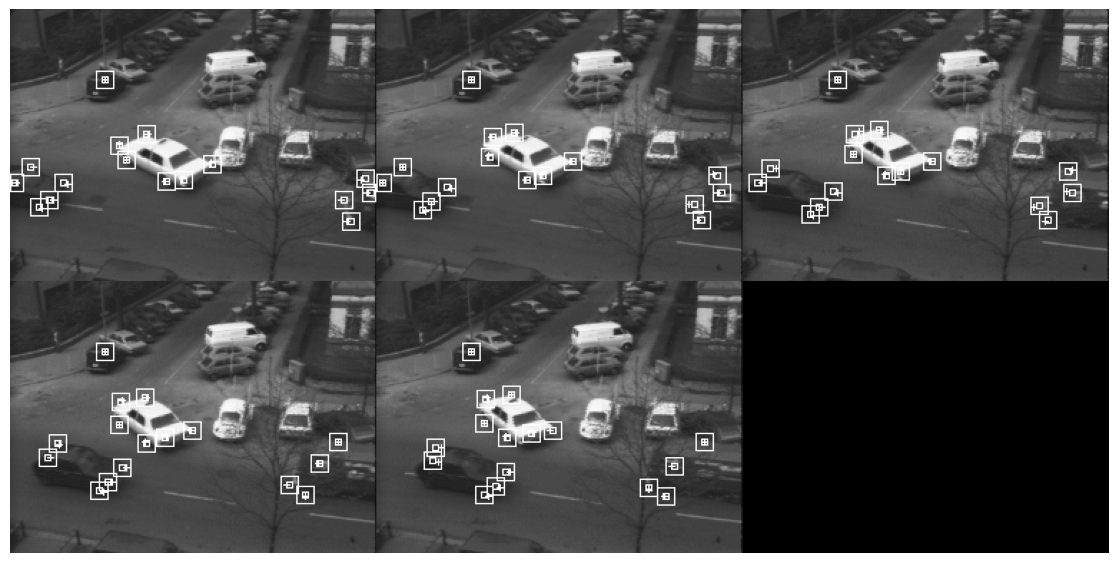

Five frames (1,5,10,15,19)from taxitrk.vs
<scaled size: (380 x 768) >


In [47]:
exec(vx.vxsh( 'vtrack if=taxi.vs pf=loc2 h=4 v=4 sz=4 of=taxitrk.vs gf=taxitrk.g' ))
exec(vx.vxsh( 'vtile taxitrk.vs n=5,4 of=taxitrkt.vs' )) 
exec(vx.vxsh( 'vclip f=1 taxitrk.vs of=taxi5' )) 
for i in (5, 10, 15, 19):
    exec(vx.vxsh( 'vclip f=$i taxitrk.vs | vxfile of=taxi5' ))
exec(vx.vxsh( 'vtile taxi5 n=3,2 of=taxi5t' ))
vd.dispmvx("taxi5t", size=1.8, capt="Five frames (1,5,10,15,19)from taxitrk.vs")

After trial and error in about ten different settings, in the vtrack command, the final algorithm choice was linear exhaustive search algorithm and the MSE correlation matching algorithm. When using other algorithms, such as grid pattern search, most of the moving points are not detected, and they are judged to be stationary. The parameter selection is search size = 4x4, and the size of a square correlation patch matrix is 4x4. By comparing and calculating the trajectory and coordinate positions of the three cars in each frame in simba, the maximum object motion between frames in taxi.vs is 3. So 4x4 search size is adequate for the motion and is not so large as to affect the visualization.


The taxi5t image shows five frames(1,5,10,15,19) of the output after applying vtrack algorithm. The topmost point is a stationary reference, so as expected, neither of its boxes change as time changes. And the + sign in other positions keeps moving, symbolizing the movement of the car, which means that the vtrack command is executed well with this parameter setting.

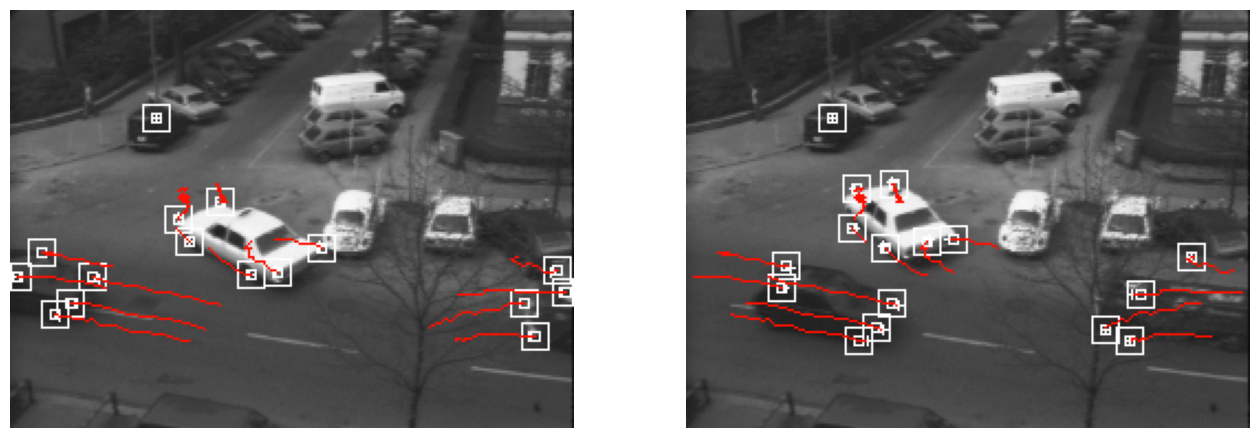

Time trajectories for the tracked feature points in 20 frames on first frame and last frame
<scaled size: (190 x 256) (190 x 256) >


In [46]:
#  Create a binary image of the tracking trajectories. 
exec(vx.vxsh( 'vrend -w  taxitrk.g of=taxitrkt.vx' ))
#  Select the first image frame of the tracked results
exec(vx.vxsh( 'vclip f=1 if=taxitrk.vs of=taxitrk1.vx' ))
#  Add the tracking trajecctories as a color overlay
exec(vx.vxsh( 'vcmix  if=taxitrk1.vx ig=taxitrkt.vx | vccvt -i of=taxitrkv.vx' ))

vd.dispmvx('taxitrkv.vx', 'taxitrkv20.vx',size=2,capt="Time trajectories for the tracked feature points in 20 frames on first frame and last frame")


Time trajectories for the tracked feature points in 20 frames are dispalyed on the first frame and last frame of the output images of vtrack. Time trajectories are more intuitive than the above image frame display. The reference point in the upper left corner is stationary, so there is no trajectory. Of the remaining points, the vast majority show the trajectory of the car in action very well. For example, the temporal trajectory of the five points of the black car on the left shows it going straight ahead. However, the point at the top of the black car on the right seems to have lost its way in the middle, and in the image frame output, the point is judged to be stationary from the 15th picture. Perhaps because at the beginning of the marking, the point was not taken precisely enough in the car, but at the junction of the car and the background.

### 3 Temporal Domain Filtering


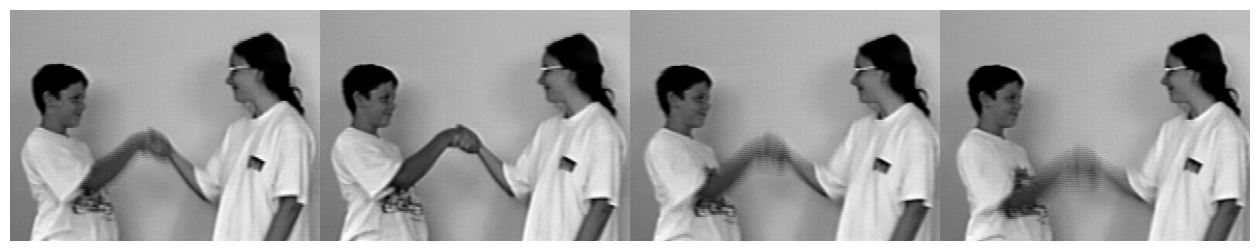

Four frames (1,5,9,11) of hand.vs with temporal mean filter, window = 3 frames
<scaled size: (224 x 1200) >


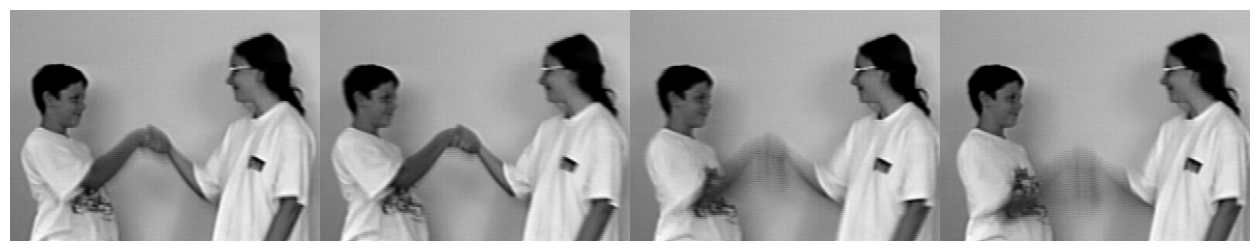

Four frames (1,5,9,11) of hand.vs with temporal mean filter, window = 5 frames
<scaled size: (224 x 1200) >


In [50]:
vd.dispmvx("handm3_4t", size=2, capt="Four frames (1,5,9,11) of hand.vs with temporal mean filter, window = 3 frames")
vd.dispmvx("handm5_4t", size=2, capt="Four frames (1,5,9,11) of hand.vs with temporal mean filter, window = 5 frames")

The temporal mean filter blurs the details in the image, and the shaking action seems more blurred than the original image. When applying a larger window size, more high frequency noise are removed. At the same time, the shaking action looks more blurred.

In [ ]:
#!/usr/bin/env python
""" vsmed Compute local 1x1x1 median using the buffer method """
from v4 import vx
from vxbuffer import *
import sys

vargs = vx.vaparse( "if= of= n= -v  - ")


if '-' in vargs:
   print ("vsmed 1x1x1 local temporal median filter")
   print ("if= input file")
   print ("of= output file")
   print ("[-v] verbose mode for very small images")
   sys.exit(0)

for arg in ['if', 'of']:
   if arg not in vargs:
       print ('vsmed error: required parameter %s is missing' % arg)
       sys.exit(1)

optv = '-v' in vargs
nn = 3

invx = vxIbuf(vargs['if'], nn);
outvx = vxObuf(vargs['of'] ); 
im = invx.i
imr = empty( im[0].shape, dtype=im.dtype);
while invx.read():
    im = invx.i
    
    for t in range(im.shape[0]):
        for y in range(im.shape[1] ):
            for x in range(im.shape[2]):
                list_m = []
                for t in range(3):
                    list_m.append(im[t][y][x])
                if list_m[0] == max(list_m): #if the first one is max
                    if list_m[1]>list_m[2]:
                        imr[y][x] = list_m[1] #the second one is median
                    else:
                        imr[y][x] = list_m[2] #the third one is median
                if list_m[1] == max(list_m): #if the second one is max
                    if list_m[0]>list_m[2]:
                        imr[y][x] = list_m[0] #the first one is median
                    else:
                        imr[y][x] = list_m[2] #the third one is median
                if list_m[2] == max(list_m): #if the third one is max
                    if list_m[1]>list_m[0]:
                        imr[y][x] = list_m[1] #the second one is median
                    else:
                        imr[y][x] = list_m[0] #the first one is median
                        

    if optv:
       print (imr)						   
    outvx.add(imr)

outvx.close()


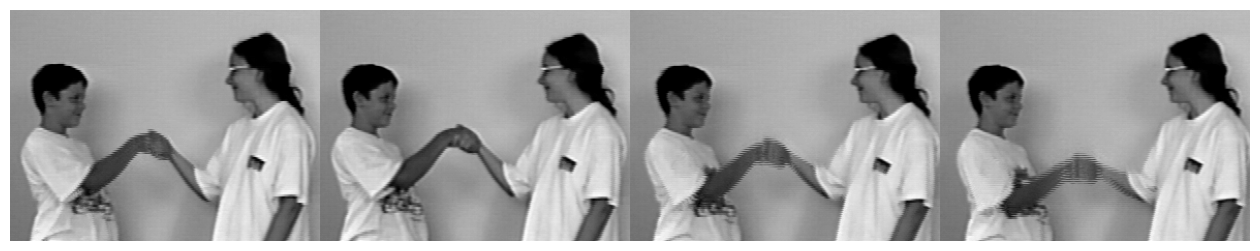

Four frames (1,5,9,11) of hand.vs with temporal median filter, window = 3 frames
<scaled size: (224 x 1200) >


In [51]:
vd.dispmvx("handmed3_4t", size=2, capt="Four frames (1,5,9,11) of hand.vs with temporal median filter, window = 3 frames")

After applying the temporal median filter, the features of hands are more clear than the original images and the mean filter output. The edges of hand are preserved because the median filter does not create new pixels but choose to preserve one of the original pixels. On the hand.vs, vsmed algorithm works well. 

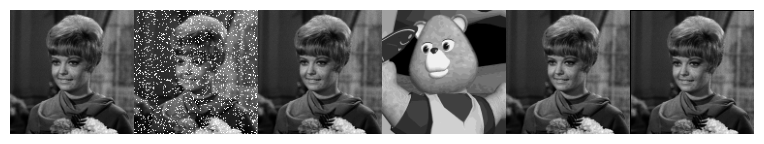

lb5.vs image sequence
<scaled size: (128 x 768) >


In [56]:
#Visualization of the lb5.vs image sequence
exec(vx.vxsh( 'vtile lb5.vs n=6,1 of=lb5.vt' ))
vd.dispmvx('lb5.vt', size=1.2, capt='lb5.vs image sequence')

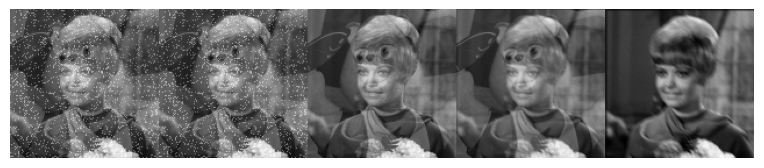

Image slices of lb5.vs with temporal mean filter, window = 3 frames
<scaled size: (128 x 640) >


In [57]:
#Visualization of the lb5.vs image sequence after temporal mean filter, window = 3
exec(vx.vxsh( 'vssump lb5.vs of=lb5mean n=3' ))
exec(vx.vxsh( 'vtile lb5mean n=5,1 of=lb5mean.vs' ))
vd.dispmvx("lb5mean.vs", size=1.2, capt="Image slices of lb5.vs with temporal mean filter, window = 3 frames")

The temporal mean filter output includes five image slices. The second image slice contains the salt and pepper noise of the previous one in the original sequence and the bear of the next one, which reflects the function of the temporal mean filter. Similarly, the third and fourth slices both have the bear's shadows overlapping. The last one becomes ambiguous due to the way the vssump algorithm is calculated.

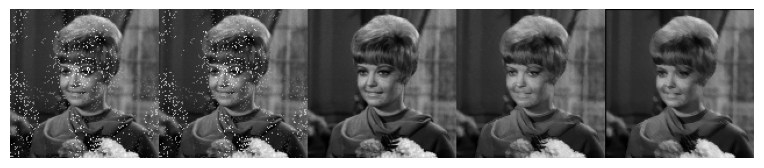

Image slices of lb5.vs with temporal median filter, window = 3 frames
<scaled size: (128 x 640) >


In [59]:
#Visualization of the lb5.vs image sequence after temporal median filter, window = 3
exec(vx.vxsh( 'vsmed lb5.vs of=lb5median' ))
exec(vx.vxsh( 'vtile lb5median n=5,1 of=lb5median.vs' ))
vd.dispmvx("lb5median.vs", size=1.2, capt="Image slices of lb5.vs with temporal median filter, window = 3 frames")

The temporal median filter output includes five image slices. The second image slice contains partial salt and pepper noise but not contains the bear. This is because after the median filtering algorithm, only some of the salt and pepper noise is selected as the median value. And the pixel value of the bear is barely selected as the median value. Similarly, the third and fourth slices both don't have the bear's shadows overlapping. When meeting with two same images in sequence, as the last two slices of the output show, the girl is not more blurred and some of the noise in the picture is erased.

### 4 Change Detection


In [ ]:
#!/usr/bin/env python
""" vsdif Compute a temporal binary difference filter using the buffer method """
from v4 import vx
from vxbuffer import *
import sys

vargs = vx.vaparse( "if= of= n= -v  - th= ")


if '-' in vargs:
   print ("vsdif 1x1xn local temporal mean filter")
   print ("if= input file")
   print ("of= output file")
   print ("[-v] verbose mode for very small images")
   print ("th= difference threshold")
   sys.exit(0)

for arg in ['if', 'of' ,'th']:
   if arg not in vargs:
       print ('vsdif error: required parameter %s is missing' % arg)
       sys.exit(1)

optv = '-v' in vargs
TH = int(vargs['th'])

invx = vxIbuf(vargs['if'], 2);
outvx = vxObuf(vargs['of'] ); 
im = invx.i
imr = empty( im[0].shape, dtype=im.dtype);
while invx.read():
    im = invx.i
    
    for y in range(im.shape[1] ):
        for x in range(im.shape[2]):
            if abs(int(im[1][y][x])-int(im[0][y][x])) > TH:
                imr[y][x] = 255
            else:
                imr[y][x] = 0

    if optv:
       print (imr)						   
    outvx.add(imr)

outvx.close()


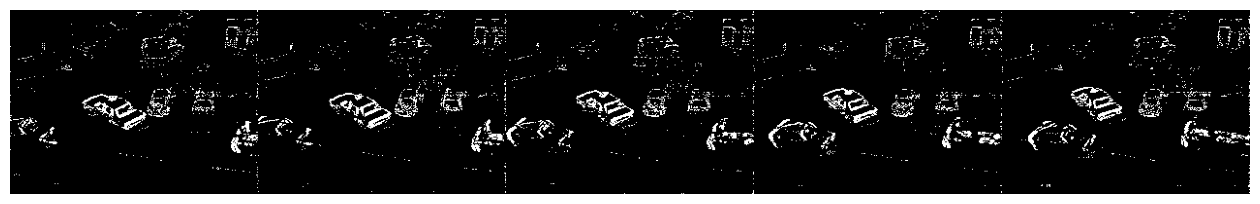

Five frames(1,5,10,15,19) from taxi.vs with vsdif, best threshold = 9 
<scaled size: (190 x 1280) >


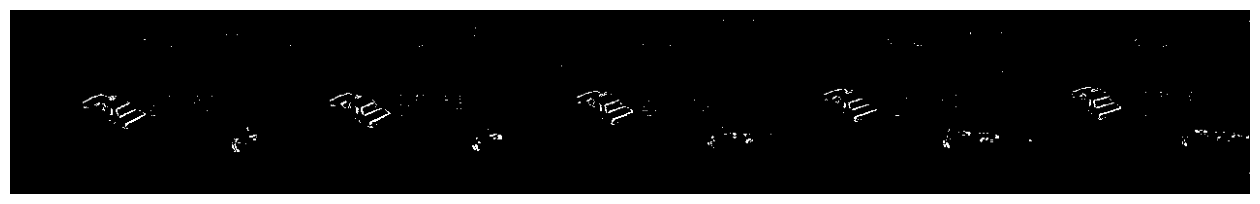

Five frames (1,5,10,15,19)from taxi.vs with vsdif, higher threshold = 30
<scaled size: (190 x 1280) >


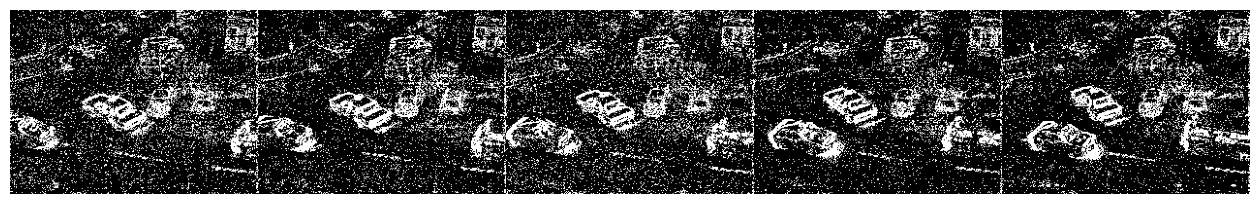

Five frames (1,5,10,15,19)from taxi.vs with vsdif, lower threshold = 3
<scaled size: (190 x 1280) >


In [66]:
vd.dispmvx("taxi_dif_9t",size=2, capt="Five frames(1,5,10,15,19) from taxi.vs with vsdif, best threshold = 9 ")
vd.dispmvx("taxi_dif_30t", size=2, capt="Five frames (1,5,10,15,19)from taxi.vs with vsdif, higher threshold = 30")
vd.dispmvx("taxi_dif_3t", size=2, capt="Five frames (1,5,10,15,19)from taxi.vs with vsdif, lower threshold = 3")

The vsdif program computes the thresholded difference between two consecutive image frames, and then produce a value of 255 for pixels that are above the threshold and 0 for pixels that are below the threshold. The thresholded difference shows the movement of objects in the image sequence. This algorithm detects the change in pixels of each image in an image sequence. The good threshold for taxi.vs is th=9. When th=9, the general outline of the three moving vehicles can be tracked on the dark background. On the output image sequence with higher threshold =30, more noise is removed, but due to the slow movement, the changing trajectory of the car in the lower left corner also disappears. On the output image sequence with lower threshold =3, although three cars are well detected, there are too much noise on the background.

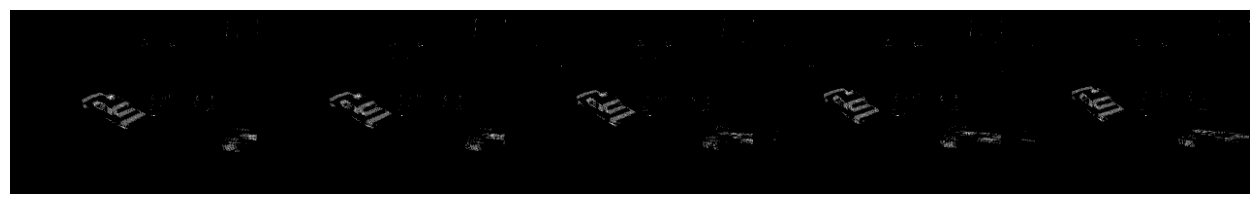

Five frames (1,4,8,12,16) of taxi_new
<scaled size: (190 x 1280) >


In [71]:
#Challenge ：process the outcome of vsdif so that only the large moving objects are identified 
exec(vx.vxsh(('vsdif if=taxi.vs th=32 of=taxi_dif_32.vx' )))
exec(vx.vxsh( 'vssump n=5 if=taxi_dif_32.vx of=new.vx' )) 
exec(vx.vxsh( 'vclip f=1 new.vx of=taxi_new' )) 
for i in (4,8,12,16):
    exec(vx.vxsh( 'vclip f=$i new.vx | vxfile of=taxi_new' ))
exec(vx.vxsh( 'vtile taxi_new n=5,1 of=taxi_newt' ))
vd.dispmvx("taxi_newt", size=2, capt="Five frames (1,4,8,12,16) of taxi_new")

To identify the large moving object, I first set the threshold parameter =32 in vsdif. The higher threshold parameter removes the noise and some objects that are relatively stationary. Next, the temporal mean filter with window=5 is applied. Because of the properties of the mean filter, new pixel values are created to fill in and make up for some of the contours removed by the previous threshold algorithm.  